# Trabalho de ADC 

### Imports

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


Tratamento de dados

In [3]:
# Read the file
paths = pd.read_csv('tsvs/paths_finished.tsv', sep='\t')

# Get the paths from the 4th column and split them by semicolons
all_paths = paths.iloc[:, 3].str.split(';')


Caracterização do dataset


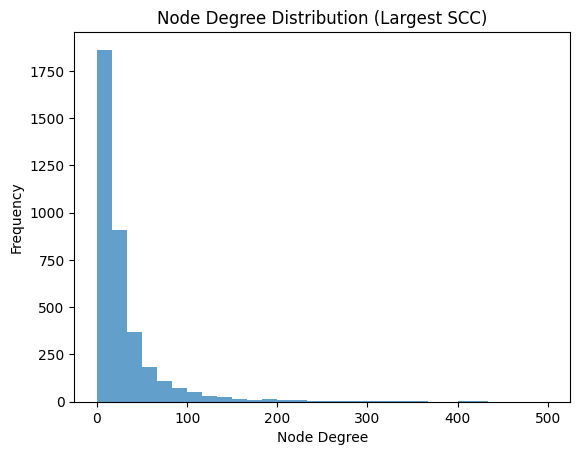

Network Characteristics (Largest SCC):
Number of Nodes: 3703
Number of Edges: 58651
Diameter: 9
Is the Network Well-Connected: True
Average Path Length: 3.221278161165046


In [4]:
G = nx.DiGraph()

# Create edges between consecutive nodes in paths
for path in all_paths:
    # Exclude backspace nodes ('<') from the path
    path = [node for node in path if node != '<']
    if len(path) > 1:  # Exclude single-node paths
        edges = list(zip(path[:-1], path[1:]))  # Create edges between consecutive nodes
        G.add_edges_from(edges)

# Find the largest strongly connected component
largest_scc = max(nx.strongly_connected_components(G), key=len)
scc_graph = G.subgraph(largest_scc).copy()

# Calculate various network metrics for the largest SCC
diameter = nx.diameter(scc_graph)
num_nodes = scc_graph.number_of_nodes()
num_edges = scc_graph.number_of_edges()
is_connected = nx.is_strongly_connected(scc_graph)
avg_path_length = nx.average_shortest_path_length(scc_graph)

# Plot node degree distribution for the largest SCC
degrees = dict(scc_graph.degree())
degree_values = list(degrees.values())

# Filter degrees to be between 0 and 500
degree_values_filtered = [degree for degree in degree_values if 0 <= degree <= 500]

plt.hist(degree_values_filtered, bins=30, range=(0, 500), alpha=0.7)
plt.xlabel('Node Degree')
plt.ylabel('Frequency')
plt.title('Node Degree Distribution (Largest SCC)')
plt.show()

# Display the calculated metrics for the largest SCC
print("Network Characteristics (Largest SCC):")
print(f"Number of Nodes: {num_nodes}")
print(f"Number of Edges: {num_edges}")
print(f"Diameter: {diameter}")
print(f"Is the Network Well-Connected: {is_connected}")
print(f"Average Path Length: {avg_path_length}")

## Encontrar os hubs do dataset

Top 10 Nodes with Highest Degrees:
Node: United_States, Degree: 1623
Node: Europe, Degree: 901
Node: United_Kingdom, Degree: 882
Node: England, Degree: 797
Node: World_War_II, Degree: 669
Node: France, Degree: 581
Node: Africa, Degree: 551
Node: Germany, Degree: 513
Node: English_language, Degree: 444
Node: North_America, Degree: 433


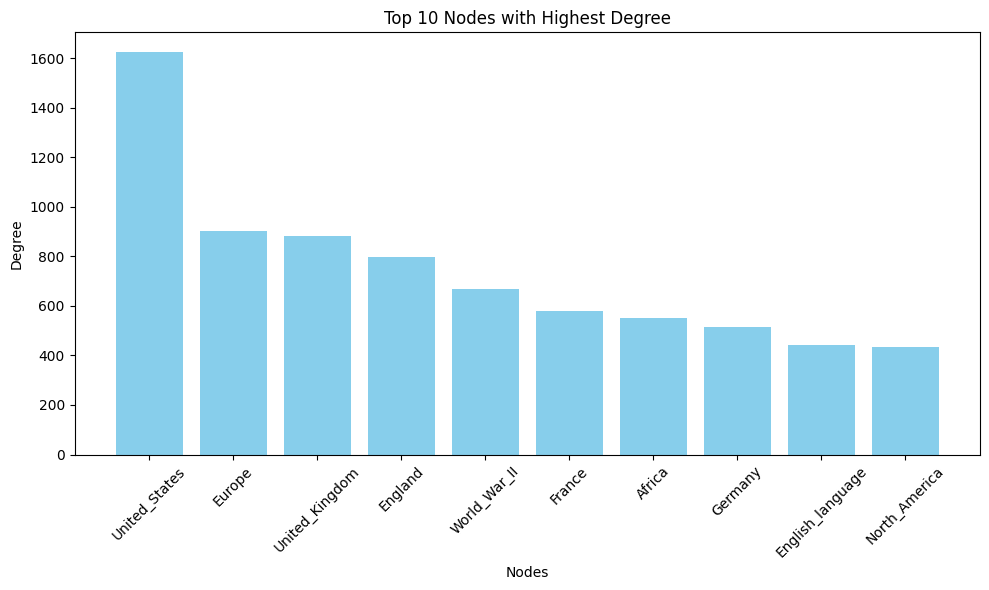

In [5]:
# Calculate node degrees
degrees = dict(G.degree())

# Get the top 10 nodes with the highest degrees
top_10_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]

# Display the top 10 nodes with the highest degrees
print("Top 10 Nodes with Highest Degrees:")
for node, degree in top_10_degrees:
    print(f"Node: {node}, Degree: {degree}")


# Get the top 10 nodes with the highest degree
top_10_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract node names and degrees for plotting
nodes = [node[0] for node in top_10_degrees]
node_degrees = [node[1] for node in top_10_degrees]

# Create histogram
plt.figure(figsize=(10, 6))
plt.bar(nodes, node_degrees, color='skyblue')
plt.xlabel('Nodes')
plt.ylabel('Degree')
plt.title('Top 10 Nodes with Highest Degree')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

Betweenness centrality

Top Nodes with Highest Betweenness Centrality:
Node: United_States, Betweenness Centrality: 0.14400174586596665
Node: United_Kingdom, Betweenness Centrality: 0.058868846286999586
Node: England, Betweenness Centrality: 0.056149894862736006
Node: Europe, Betweenness Centrality: 0.04950606281599599
Node: Africa, Betweenness Centrality: 0.03238095462031285
Node: World_War_II, Betweenness Centrality: 0.030024663671772166
Node: Earth, Betweenness Centrality: 0.024771081887863967
Node: France, Betweenness Centrality: 0.0233843922290854
Node: Germany, Betweenness Centrality: 0.023235475018025833
Node: India, Betweenness Centrality: 0.019726929379348602


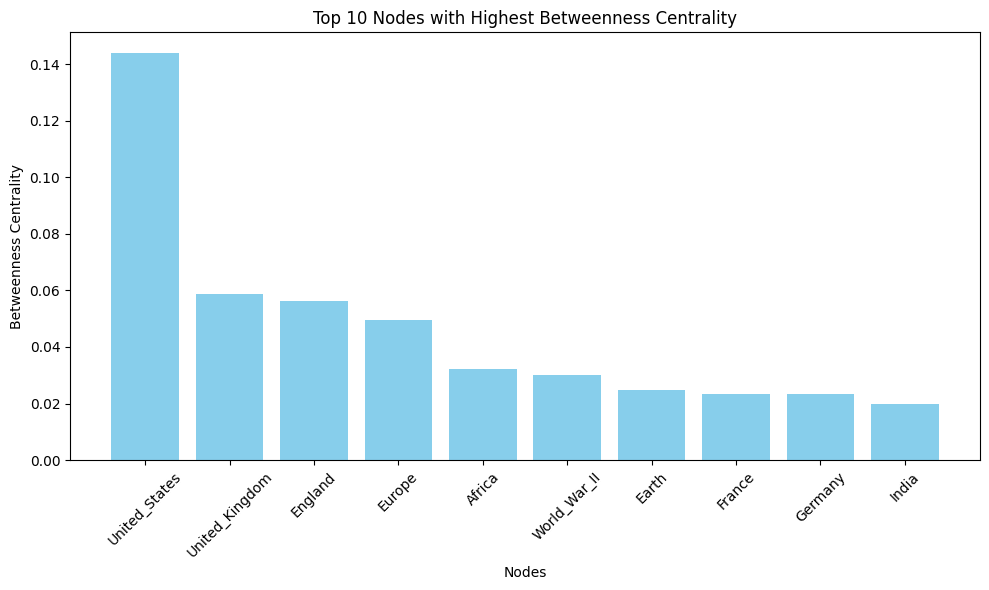

In [6]:
# Calculate betweenness centrality
betweenness = nx.betweenness_centrality(G)

# Get the top nodes with the highest betweenness centrality
top_nodes_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

# Display the top nodes with the highest betweenness centrality
print("Top Nodes with Highest Betweenness Centrality:")
for node, centrality in top_nodes_betweenness:
    print(f"Node: {node}, Betweenness Centrality: {centrality}")



# Get the top 10 nodes with the highest betweenness centrality
top_10_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract node names and betweenness centrality for plotting
nodes = [node[0] for node in top_10_betweenness]
node_betweenness = [node[1] for node in top_10_betweenness]

# Create histogram
plt.figure(figsize=(10, 6))
plt.bar(nodes, node_betweenness, color='skyblue')
plt.xlabel('Nodes')
plt.ylabel('Betweenness Centrality')
plt.title('Top 10 Nodes with Highest Betweenness Centrality')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

Nós mais acessados do dataset


In [7]:

# Create a list to store all nodes (excluding '<' backspace node)
all_nodes = []
for path in all_paths:
    all_nodes.extend([node for node in path if node != '<'])

# Count occurrences of each node
node_counts = pd.Series(all_nodes).value_counts()

# Get the top 4 most accessed nodes
top_9_nodes = node_counts.head(9)
print("Top 9 most accessed nodes (excluding '<' backspace node):")
print(top_9_nodes)

Top 9 most accessed nodes (excluding '<' backspace node):
United_States     8896
Europe            4362
United_Kingdom    3904
England           3332
Earth             3223
Africa            2795
World_War_II      2301
North_America     1884
Germany           1769
Name: count, dtype: int64


Caminhos mais frequentes

In [8]:
# Create a dictionary to count occurrences of paths
path_counts = {}
for path in all_paths:
    # Convert the path into tuples to make it hashable
    path_tuple = tuple(path)
    
    # Exclude backspace nodes ('<') from the path
    path_tuple = tuple(node for node in path_tuple if node != '<')
    
    # Increment the count for this path in the dictionary
    if len(path_tuple) > 1:  # Exclude single-node paths
        if path_tuple in path_counts:
            path_counts[path_tuple] += 1
        else:
            path_counts[path_tuple] = 1

# Get the top 5 most frequently taken paths
top_paths = sorted(path_counts.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the top paths
for path, count in top_paths:
    print(f"Path: {' -> '.join(path)}, Count: {count}")

Path: Brain -> Computer_science -> Information -> Communication -> Telephone, Count: 144
Path: Bird -> Fish -> Whale_shark -> Shark -> Great_white_shark, Count: 86
Path: Asteroid -> Earth -> Europe -> Norway -> Viking, Count: 76
Path: Theatre -> India -> Mammal -> Zebra, Count: 74
Path: Theatre -> Dance -> Animal -> Mammal -> Zebra, Count: 69


Nós com maior centralidade

In [9]:
# Create edges between consecutive nodes in paths
for path in all_paths:
    # Exclude backspace nodes ('<') from the path
    path = [node for node in path if node != '<']
    if len(path) > 1:  # Exclude single-node paths
        edges = list(zip(path[:-1], path[1:]))  # Create edges between consecutive nodes
        G.add_edges_from(edges)

# Calculate node degrees (number of edges connected to each node)
node_degrees = G.degree()

# Sort nodes based on degree centrality
sorted_nodes = sorted(node_degrees, key=lambda x: x[1], reverse=True)

# Print nodes with higher edge centrality (top nodes based on degree centrality)
print("Nodes with higher edge centrality:")
for node, degree in sorted_nodes[:5]:  # Print top 5 nodes with highest degree centrality
    print(f"Node: {node}, Degree Centrality: {degree}")

Nodes with higher edge centrality:
Node: United_States, Degree Centrality: 1623
Node: Europe, Degree Centrality: 901
Node: United_Kingdom, Degree Centrality: 882
Node: England, Degree Centrality: 797
Node: World_War_II, Degree Centrality: 669
